In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
import matplotlib as mpl
sys.path.append('../python/')
os.environ['MPLCONFIGDIR'] = '../mplstyles'


#fonts
# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'32'}
legend_font = {'fontname':'Arial', 'size':'22'}

#fonts global settings
mpl.rc('font',family=legend_font['fontname'])

import numpy as np
#set up a plot 
from matplotlib import pyplot as plt
#got smarter about the mpl config: see mplstyles/ directory
plt.style.use('standard')

# Joint Distributions of $E_p$ and $E_q$ with SuperCDMS Goal Resolutions

The purpose of this notebook is to detail the calculation of the joint distribution of $E_p$ and $E_q$ (the phonon and ionization energies) for SuperCDMS iZIP detectors with the SuperCDMS SNOLAB goal resolutions. Specifically, we are interested in at which energy the electron-recoil (ER) and nuclear-recoil (NR) bands overlap for a given effective nuclear-recoil Fano factor. The lower this energy is the more low-mass reach the iZIP SuperCDMS search will have in an essentially background-free environment. 

Like the notebook `QEr_2D_joint.ipynb` we will build up the distributions from conditional probability arguments beginning with the random variables and constants in the following table. 

variable/constant name|Description 
:-|:-
Y|measured ionization yield 
N|number of e/h pairs
$\delta Q$ | instrumental fluctuation on the ionization measurement
$\delta P$ | instrumental fluctuation on the phonon measurement
$E_r$ | true recoil energy
$\epsilon$ | average energy to create a single electron-hole pair for an electron-recoil in keV
$V$ |voltage across the detector in Volts
F | effective Fano factor for nuclear-recoils
F$_{er}$ |Fano factor for electron-recoils

We seek the joint distribution of $E_p$ and $E_q$ given a fixed true energy, $E_r$. It is equal to the 5-variable joint distribution integrated appropriately over the 3 unwanted variables. 

\begin{equation}
P(E_p,E_q | E_r) = \int_{-\infty}^{\infty} d(\delta P) \int_{-\infty}^{\infty} d(\delta Q) \int_0^{\infty} dN
 P(E_p,E_q,\delta P,\delta Q, N | E_r)
\end{equation}

The technique used is to write down the 5-variable joint distribution based on the rules of conditional probability and the fact that N, $\delta P$, and $\delta Q$ are independent random variables. Then the appropriate integrals can be carried out analytically or numerically.

## Resolutions

In addition to the variables already defined we need some kind of specifications for the (assumed Gaussian) resolutions on the three fundamental measured variables: N, $\delta Q$, and $\delta P$. The resolutions are denoted $\sigma_N$, $\sigma_q$, and $\sigma_p$ respectively, and are assumed to be functions of the true recoil energy $E_r$. This assumption means that for $\sigma_q$ and $\sigma_p$--which are most naturally described as functions of ionization energy and total phonon energy respectively--the arguments to the functions need to be _converted_ from the true recoil energy $E_r$ to those energy scales. In what follows this conversion is left implicit so that $\sigma_q(E_r)$ and $\sigma_p(E_r)$ are the final functions with independent variable of the true recoil energy.

Both the $\sigma_q(E_r)$ and the $\sigma_p(E_r)$ are composed of the baseline resolutions (which we call $\sigma_{0,q}$ and $\sigma_{0,p}$) in the SuperCDMS SNOLAB sensitivity paper [REF] and reasonable guesses for the energy-dependent reconstruction resolution. 

These two resolutions can therefore be modeled as follows:

\begin{equation}
\begin{aligned}
\tilde{\sigma}_q(E_{ee}) &= \sqrt{\sigma_{0,q} + \epsilon F_{er} E_{ee}} \\
\tilde{\sigma}_p(E_{ee}) &= \sqrt{\sigma_{0,p} + (V^2/\epsilon) F_{er} E_{ee}},
\end{aligned}
\end{equation}

Where $E_{ee}$ is the electron-equivalent energy for a given scatter. These functions can easily be turned into the aforementioned forms where the independent variable is the _recoil_ energy and not the _electron-equivalent_ energy, so long as one has a yield model.

The $\sigma_N$ is the standard deviation of the number of electron-hole pairs, which can be computed (for a fixed $E_r$) using the effective Fano factor F. It is given simply by:

\begin{equation}
\sigma_N(E_r) = \sqrt{F(\bar{Y}E_r/\epsilon)},
\end{equation}

Where $\bar{Y}$ is the mean ionization yield at $E_r$. Whenever $\bar{Y}$ is written it is tacitly assumed to be a function of the true recoil energy, $E_r$.

In [2]:
#constants
V=4.0
eps=3.3/1000.0
F=0.00001
F0=0.00001 #number to use when we want effectively zero Fano factor

#get baseline resolutions for SuperCDMS goal for iZIPs
sig0p = 0.050 #50 eV
sig0q = 0.100 #100 eV

Fer = 0.1 #Fano factor for ERs
#sigp and sigq functions for ERs
sigp = lambda E: np.sqrt(sig0p**2 + ((V/1000)**2/eps)*Fer*E)
sigq = lambda E: np.sqrt(sig0q**2 + eps*Fer*E)
sigpv = np.vectorize(sigp)
sigqv = np.vectorize(sigq)

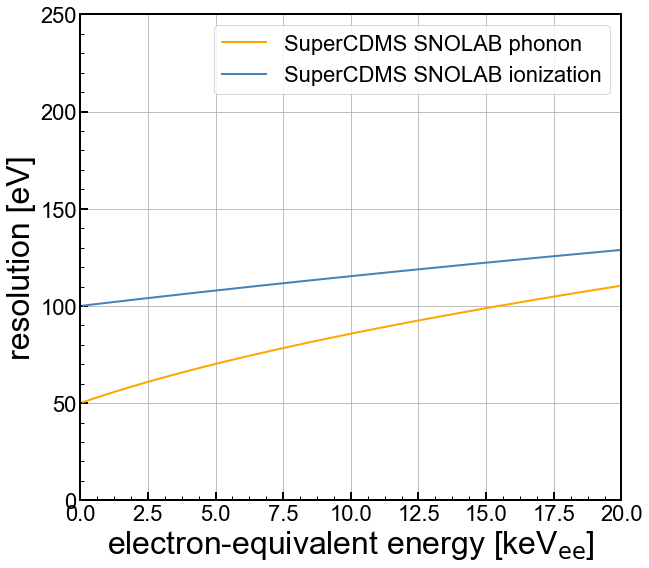

In [3]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

X = np.arange(0.1,20,0.01)

ax1.plot(X,sigpv(X)*1000,color='orange',linestyle='-',label='SuperCDMS SNOLAB phonon')
ax1.plot(X,sigqv(X)*1000,color='steelblue',linestyle='-',label='SuperCDMS SNOLAB ionization')


#ax1.axvline(t(t_test[idx]), color='k', linestyle='-', lw=2, alpha=0.8,label=None)

ymin = 0
ymax = 250

ax1.set_yscale('linear')
#ax1.set_yscale('linear')
ax1.set_xlim(0, 20) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'electron-equivalent energy [keV$_{\mathrm{ee}}$]',**axis_font)
ax1.set_ylabel('resolution [eV]',**axis_font)
ax1.grid(True)
#ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figure.png')
plt.show()

For nuclear recoils, the electron-equivalent energy is _not_ equal to $E_{ee}$, so to get the functions $\sigma_q(E_r)$ and $\sigma_p(E_r)$ a conversion is needed. The conversion is:

\begin{equation} 
E_{ee}(E_r) = Y(E_r)E_r,
\end{equation}

and since the ionization yield ($Y(E_r)$) is not unity for NRs, the following functions are obtained.

In [4]:
#get a yield model
import lindhard as lind

ynr_ev = lind.getLindhardGe()
ynr = lambda Er: ynr_ev(Er*1000)

Eee = lambda Er: ynr(Er)*Er

sigp_NR = lambda Er: sigp(Eee(Er))
sigq_NR = lambda Er: sigq(Eee(Er))
sigp_NRv = np.vectorize(sigp_NR)
sigq_NRv = np.vectorize(sigq_NR)

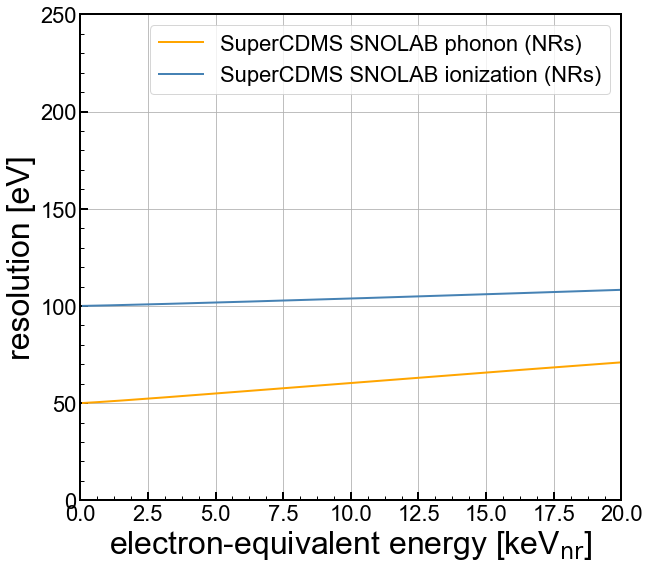

In [5]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

X = np.arange(0.1,20,0.01)

ax1.plot(X,sigp_NRv(X)*1000,color='orange',linestyle='-',label='SuperCDMS SNOLAB phonon (NRs)')
ax1.plot(X,sigq_NRv(X)*1000,color='steelblue',linestyle='-',label='SuperCDMS SNOLAB ionization (NRs)')


#ax1.axvline(t(t_test[idx]), color='k', linestyle='-', lw=2, alpha=0.8,label=None)

ymin = 0
ymax = 250

ax1.set_yscale('linear')
#ax1.set_yscale('linear')
ax1.set_xlim(0, 20) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'electron-equivalent energy [keV$_{\mathrm{nr}}$]',**axis_font)
ax1.set_ylabel('resolution [eV]',**axis_font)
ax1.grid(True)
#ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figure.png')
plt.show()

# Computing the Joint Distribtution

Now that we have the resolutions we can follow the basic procedure from the note `QEr_2D_joint.ipynb` in order to arrive at the joint distribution in $E_p$ and $E_q$ given a single recoil energy $E_r$. 

First, it's important to write the identities that exist among our set of variables:

\begin{equation}
\begin{aligned}
E_p &= E_r + VN + \delta P \\
E_q &= \epsilon N + \delta Q
\end{aligned}
\end{equation}

Then we make the following definitions:

\begin{equation}
\begin{aligned}
\delta_p &\equiv \delta \left(E_p - \left(E_r + VN + \delta P \right) \right) \\
\delta_q &\equiv \delta \left(E_q - \left(\epsilon N + \delta Q\right) \right).
\end{aligned}
\end{equation}

Now, the 5-variable joint distribution can be written straight away. 

\begin{equation}
P(E_p,E_q,N,\delta P, \delta Q|E_r) = \delta_p \delta_q P(N)P(\delta P) P(\delta Q)
\end{equation}

We take each of the independent distributions to be normally distributed, $\delta P$ and $\delta Q$ with mean zero, and $N$ with mean $\bar{N} = \bar{Y}E_r/\epsilon$. The widths of the distributions are $\sigma_p$, $\sigma_q$, and $\sigma_N$ respectively. 

**NOTE: The variable N is actually a discrete variable and is not normally distributed. In fact, the distribution is not known and the first two moments are described by the ionization yield $\bar{Y}$ and the Fano (or effective Fano) factor. Since we are focusing on high-energy recoils (above 10 keV) we expect at least 1,000 or so charges to be produced. This justifies the use of a continuous distribution. The mean of N is also large even in the nuclear recoil case, so there is very small probabilitiy that N will be < 0 owing to the continous modeling. As for the distribution being normal, that is an approximation that is not known to be valid.**

## Integration

With this 5-variable joint distribution defined, we proceed in a very similar way to the `QEr_2D_joint.ipynb` note. First, make the definition:

\begin{equation}
N_{pqn} \equiv \frac{1}{\sqrt{2\pi\sigma_p^2}}\frac{1}{\sqrt{2\pi\sigma_q^2}}\frac{1}{\sqrt{2\pi\sigma_N^2}}.
\end{equation}

Then we have:

\begin{equation}
P(E_p,E_q,\delta P, \delta Q, N|E_r) = N_{pqn} \delta_p \delta_q exp\left[-\frac{\delta Q^2}{2\sigma_q^2}\right]exp\left[-\frac{\delta P^2}{2\sigma_p^2}\right]exp\left[-\frac{\left(\bar{N} - N\right)^2}{2\sigma_N^2}\right].
\end{equation}

We know that the desired joint distribution will be given as the following:

\begin{equation}
P(E_p,E_q|E_r) = \int_0^{\infty} dN \int_{-\infty}^{\infty} d(\delta P) \int_{-\infty}^{\infty} d(\delta Q) P(E_p,E_q,\delta P, \delta Q, N|E_r).
\end{equation}

Using the two delta functions for the $\delta P$ and $\delta Q$ integrals (no changes of variables necessary) we arrive as follows:

\begin{equation}
P(E_p,E_q|E_r) = \int_0^{\infty} dN N_{pqn} exp\left[-\frac{\left(E_q - \epsilon N \right)^2}{2\sigma_q^2}\right]exp\left[-\frac{\left(E_p - E_r - VN \right)^2}{2\sigma_p^2}\right]exp\left[-\frac{\left(\bar{N} - N\right)^2}{2\sigma_N^2}\right].
\end{equation}

If we expand the squared terms in the exponents and re-group terms, we can come up with a standard integral, that looks like:

\begin{equation}
P(E_p,E_q|E_r) = C\int_0^{\infty} dx e^{ax}e^{-bx^2} = C \frac{e^{\frac{a^2}{4b}}\sqrt{\pi}}{\sqrt{b}}\left(erf\left(\frac{a}{2\sqrt{b}}\right) + 1\right). 
\end{equation}

With the following definitions:

\begin{equation}
\begin{aligned}
C(E_p,E_q,E_r) &= N_{pqn}
exp\left[-\frac{\left(E_p - E_r\right)^2}{2\sigma_p^2}\right]
exp\left[-\frac{E_q^2}{2\sigma_q^2}\right] 
exp\left[-\frac{\bar{N}^2}{2\sigma_N^2} \right] \\
a(E_p,E_q,E_r) &= \left[\frac{2V\left(E_p - E_r\right)}{2\sigma_p^2}
+\frac{2\epsilon E_q}{2\sigma_q^2} +\frac{2\bar{N}}{2\sigma_N^2}\right] \\
b(E_p,E_q,E_r) &= \left[\frac{1}{2\sigma_N^2} +\frac{\epsilon^2}{2\sigma_q^2} + \frac{V^2}{2\sigma_p^2}\right].
\end{aligned}
\end{equation}

This function has been coded into the file `../prob_dist.py` under the function name `EpEq_v2_2D_fast`. The way it works is that you supply all the necessary inputs (functions or variables) to that function and it returns a function object. 

In [6]:
#get an ER yield model
yer = lambda Er: 1
#print(ynr(10))

#get the 2D resolution function
import prob_dist as pd

#Pe = pd.EpEq_v2_2D_fast(sigp,sigq,V,eps,F0,yer) 
P = pd.EpEq_v2_2D_fast(sigp,sigq,V,eps,F,ynr) 
#P = pd.EpEq_v2_2D_fast(sigp,sigq,V,eps) 

#test for reasonable pars
Er0 = 10.0
Eq0 = ynr(Er0)*Er0
#Eq0 = (0.16*Er0**0.18)*Er0
Ep0 = Er0 + (V/(1000*eps))*Eq0
print(Ep0)
print(Eq0)
print(Er0)
print(P(Ep0,Eq0,Er0))


Etest=Er0

#check for normalization
from scipy import integrate
#distribution is sharp so need a small region around the peak. 
limit = 0.5
norm = integrate.dblquad(P, Ep0-limit, Ep0+limit, Eq0-limit, Eq0+limit,args=(Etest,))
print(norm)

#Pq = lambda Eq: integrate.quad(P,-100,100,args=(Eq,Etest,))[0]
#P1q = lambda Q: integrate.quad(lambda Etr,Q,Er:P1(Q,Etr,Er),lowlim,uplim,args=(Q,Etest,))[0]
#print(Pq(Eq0))
#norm = integrate.quad(Pq,-100,100)
#print(norm)
#norm = integrate.quad(P1q,-0.2,4)
#print(norm)

12.865266985160709
2.3638452627575854
10.0
25.385531356458706
(0.0, 0)


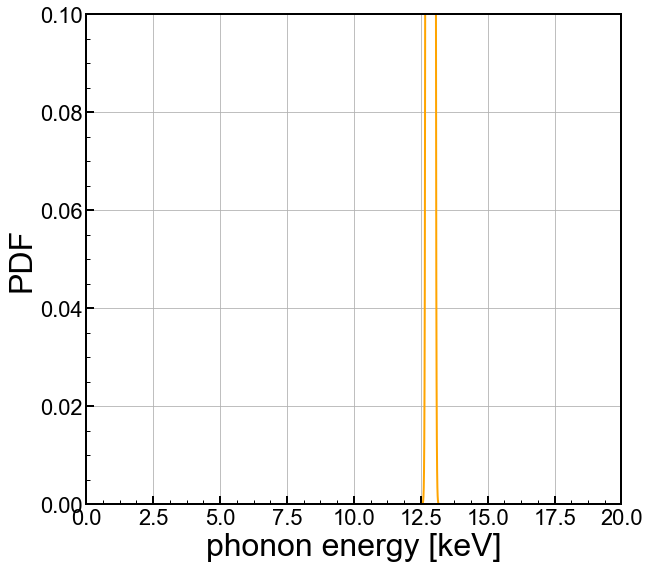

In [7]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

Pv = np.vectorize(P)
X = np.arange(0.1,20,0.01)

ax1.plot(X,Pv(X,Eq0,Er0),color='orange',linestyle='-',label='SuperCDMS SNOLAB phonon (NRs)')


#ax1.axvline(t(t_test[idx]), color='k', linestyle='-', lw=2, alpha=0.8,label=None)

ymin = 0
ymax = 100/1000

ax1.set_yscale('linear')
#ax1.set_yscale('linear')
ax1.set_xlim(0, 20) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'phonon energy [keV]',**axis_font)
ax1.set_ylabel('PDF',**axis_font)
ax1.grid(True)
#ax1.yaxis.grid(True,which='minor',linestyle='--')
#ax1.legend(loc=1,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figure.png')
plt.show()